### Import relevant libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Generate random input data to train on

In [3]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

inputs = np.column_stack((xs, zs))
print(inputs.shape)

(1000, 2)


### Create the targets we will aim at

In [5]:
noise = np.random.uniform(-1, -1, (observations,1))

targets = 2*xs - 3*zs + 5 + noise 
print(targets.shape)

(1000, 1)


### Plot the training data
The point is to see that there is a strong trend that our model should learn to reproduce.

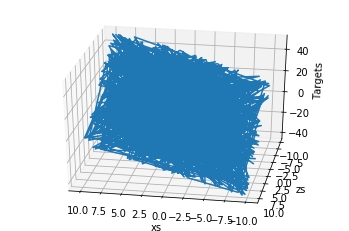

In [9]:
targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs, zs, targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)

Our algorithm try to find weights and bias. In Gradient Descent we start from arbitary number, but in this case, we don't want to start from any arbitary number. Rather, we randomly select some small initial weights. 

### Initialize variables

In [15]:
init_range = 0.1 
#our initial weights and biases will be picked randomly from the interval [-0.1,0.1]

weights = np.random.uniform(-init_range, init_range, size=(2,1))
#Our weights would be 2x1 matrix

biases = np.random.uniform(-init_range, init_range, size=1)
print("weights: ")
print(weights)
print("biases: ")
print(biases)

weights: 
[[-0.01732278]
 [-0.04395426]]
biases: 
[0.04777816]


### Set Learning Rate

In [16]:
learning_rate = 0.02

### Train the model

In [18]:
for i in range(100):
    outputs = np.dot(inputs, weights) + biases 
    #This is 1000x2 matrix multiplied by 2x1. Result would be 1000x1 matrix
    
    deltas = outputs-targets
    loss = np.sum(deltas ** 2) / 2 / observations
    #L2-norm loss formula / observation = Mean (average) loss
    
    print(loss)
    
    deltas_scaled = deltas/observations
    
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled) 
    #We transposed inputs matrix because we can't simply multiply 1000x2 matrix to 1000x1 matrix
    biases = biases - learning_rate * np.sum(deltas_scaled)
    
#Plan of each iteration. 
#Calculate Outputs -> Compare outputs to targets through the loss -> Print the loss -> Adjust weights and biases

227.07622287341127
30.93615120867938
9.613004795773143
7.0678454502581936
6.554601058521605
6.270308957207529
6.0198763791364795
5.781799471166432
5.553395617508962
5.334042902426667
5.123357489014883
4.9209941293355985
4.726623795217906
4.539930740756827
4.360611723326261
4.188375481404881
4.022942258174684
3.8640433467493596
3.7114206536816736
3.5648262797473316
3.424022117291144
3.288779463477782
3.1588786488184697
3.0341086803702035
2.914266899027955
2.799158650353213
2.6885969684041804
2.582402272054142
2.4804020733046785
2.3824306971199705
2.288329012327165
2.1979441731456713
2.1111293709255836
2.0277435956919856
1.9476514071078201
1.8707227144833192
1.7968325654746378
1.7258609431285428
1.657692570943438
1.5922167256301347
1.5293270572682371
1.4689214165660187
1.41090168894322
1.3551736351672716
1.3016467382841053
1.2502340565949113
1.2008520824400517
1.1534206065607473
1.107862587818245
1.0641040280588194
1.022073851921401
0.9817037913925708
0.9429282749214308
0.905684320914229

### We minimized our loss and let's check weights and biases

In [19]:
print("Weights:")
print(weights)
print("Biases:")
print(biases)

Weights:
[[ 2.00188221]
 [-3.00425793]]
Biases:
[3.47729289]


### In this example i want to try to find weights and biases with gradient descent.
We used (targets = 2*xs - 3*zs + 5 + noise) formula to get targets manually. And our algorithm have to find biases and weights when we got only input and targets.  
After 100 loops:  
First weight: 2.00188221 (It has to be 2, almost)  
Second weight: -3.00425793 (It has to be -3, almost)  
Bias: 3.47729289 (It has to be 5)  
  
Let's see results after one more 100 Loops run.

In [21]:
for i in range(100):
    outputs = np.dot(inputs, weights) + biases 
    deltas = outputs-targets
    loss = np.sum(deltas ** 2) / 2 / observations
    #print(loss)
    deltas_scaled = deltas/observations
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled) 
    biases = biases - learning_rate * np.sum(deltas_scaled)

In [22]:
print("Weights:")
print(weights)
print("Biases:")
print(biases)

Weights:
[[ 2.00003346]
 [-3.00007569]]
Biases:
[3.99070868]


We can get more and more accurate when we loop it again. But in this exercise, i just want to show you how gradient descent works. We can simply change learning_rate, number of observations to see how it affects.
In my summary: i can tell that learning_rate can be higher and it would be faster than before but it can't get lower point.
### Plot last outputs vs targets to see our final model accuracy
If our model works correctly, our line must be closer to a 45 degree.

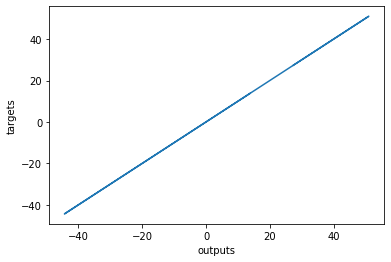

In [24]:
plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()